In [1]:
from math import pi, sqrt
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
from matplotlib.lines import Line2D


In [2]:
sns.set_theme("paper", "whitegrid", "Dark2", "DejaVu Sans", rc={"figure.dpi": 100})


In [3]:
paths = [
    "out/MsePredictor__2022-09-20_14:36:02.csv",
    "out/PcaPredictor__2022-09-29_12:43:25.csv",
    "out/GlowWeightedPredictor_128-2_2022-09-25_18:07:37.csv",
    "out/ResnetPredictorCoSi__2022-10-04_14:32:17.csv",
    "out/GlowCosinePredictor_128-2_2022-10-04_17:12:25.csv",
]


FileNotFoundError: [Errno 2] No such file or directory: 'out/MsePredictor__2022-09-20_14:36:02.csv'

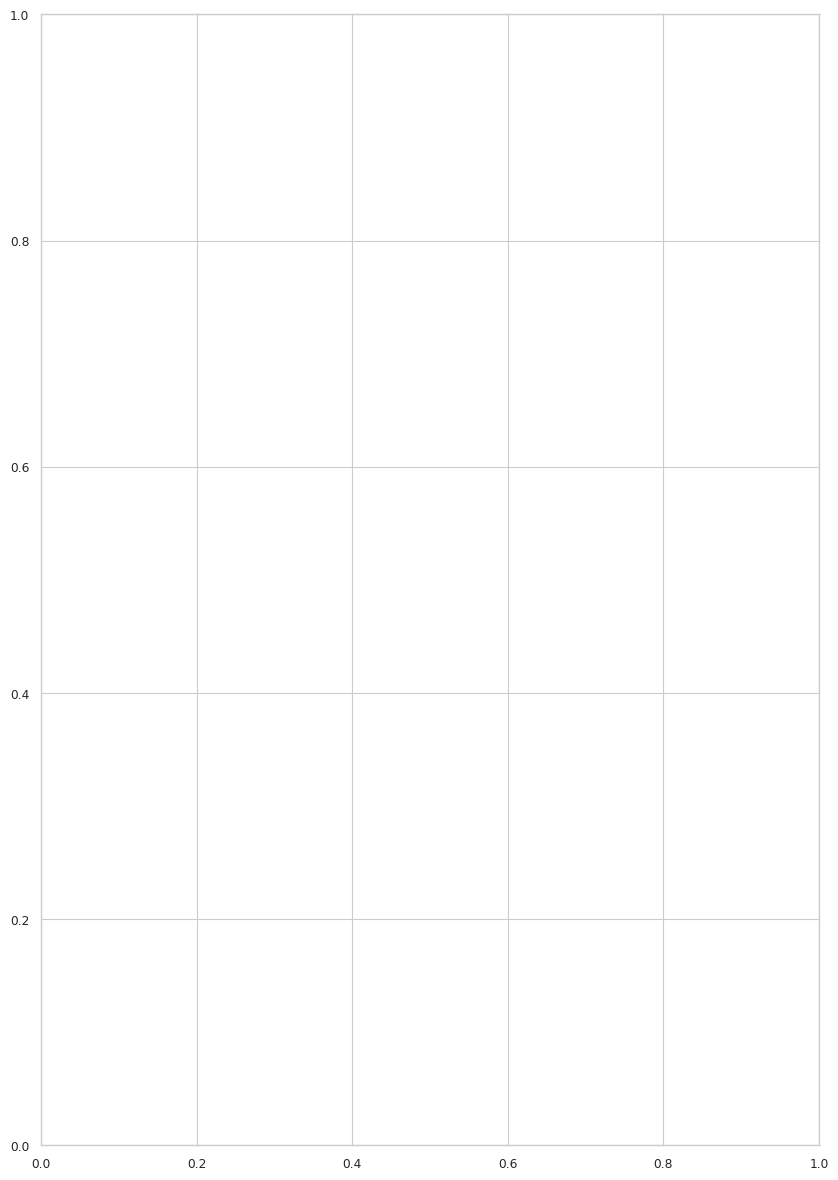

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8.27, 11.69), constrained_layout=True)

h = 4.5
names = []

for i, path in enumerate(paths):
    df = pd.read_csv(path, header=1)

    name = path.replace("out/", "", 1,).split(
        "_"
    )[0]
    # name = name.replace("Predictor", "\nPredictor", 1)
    name = name.replace("Predictor", "", 1)
    names.append(name)

    results_all = df["result"]
    results_8c2 = df[df["trial_type"] == "8choose2"]["result"]
    results_2c1 = df[df["trial_type"] == "2choose1"]["result"]
    means = [results_all.mean(), results_8c2.mean(), results_2c1.mean()]

    ax.barh(
        -(np.arange(len(means)) + h * i),
        means,
        height=1.0,
        color=[f"C{i}" for i in range(len(means))],
    )
    for j, percentage in enumerate(means):
        fw = "bold" if j == 0 else "regular"
        ax.text(
            percentage - 0.01,
            -(j + h * i),
            f"{percentage:.3f}",
            fontweight=fw,
            ha="right",
            va="center",
        )

l1 = ax.axvline(
    ((0.23901098901098905 * 8772) + (0.5 * 7520)) / 16292,
    alpha=0.75,
    color="C0",
    label="chance level",
)
l2 = ax.axvline(0.23901098901098905, alpha=0.75, color="C1", label="chance level")
l3 = ax.axvline(0.5, alpha=0.75, color="C2", label="chance level")

ax.set_yticks(-(np.arange(len(paths)) * h + 1))
ax.set_yticklabels(names, rotation=30)  # , va="center")
ax.set_xlim(0, 1)

plt.xlabel("Triplet accuracy")
plt.ylabel("Predictor")

legend_elements = [
    matplotlib.patches.Patch(facecolor="C0", edgecolor="white", label="full"),
    matplotlib.patches.Patch(facecolor="C1", edgecolor="white", label="8-rank-2"),
    matplotlib.patches.Patch(facecolor="C2", edgecolor="white", label="2-choose-1"),
]

plt.grid(False, "both", "y")
plt.legend(
    handles=[legend_elements[0], l1, legend_elements[1], l2, legend_elements[2], l3],
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
)

plt.show()


In [ ]:
fig.savefig("plot.pdf")


---

In [5]:
csv_paths = [
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/SimplePredictor_mse__2022-10-09_12:20:49.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/SimplePredictor_cos__2022-10-09_12:22:08.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/PcaPredictor_mse_pca_emb_10_2022-10-09_12:34:19.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/PcaPredictor_cos_pca_emb_10_2022-10-09_12:35:58.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/PcaPredictor_mse_pca_emb_100_2022-10-09_12:38:01.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/PcaPredictor_cos_pca_emb_100_2022-10-09_12:39:38.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/PcaPredictor_mse_pca_emb_1000_2022-10-09_12:41:43.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/PcaPredictor_cos_pca_emb_1000_2022-10-09_12:43:22.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/ResnetPredictor_mse_resnet-D-2_-2_2022-10-09_12:55:55.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/ResnetPredictor_cos_resnet-D-2_-2_2022-10-09_12:57:30.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/ResnetPredictor_mse_resnet-D-2_-1_2022-10-09_12:52:03.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/ResnetPredictor_cos_resnet-D-2_-1_2022-10-09_12:53:56.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/GlowSimplePredictor_mse_128-2_2022-10-09_12:53:43.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/GlowSimplePredictor_cos_128-2_2022-10-09_13:03:38.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/GlowBayesPredictor_mse_128-2_2022-10-09_13:13:48.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/GlowBayesPredictor_cos_128-2_2022-10-09_13:24:15.csv",
    ),
    (
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/GlowWeightedPredictor_mse_128-2_2022-10-09_13:35:16.csv",
        "/home/lukas/Documents/bachelor-thesis/bachelor_thesis/tfp-glow/evaluation/out/GlowWeightedPredictor_cos_128-2_2022-10-09_13:51:23.csv",
    ),
]


In [6]:
names = [
    "Simple\n(Pixels)",
    "PCA\n(10)",
    "PCA\n(100)",
    "PCA\n(1000)",
    "ResNet\n(Penultimate)",
    "ResNet\n(Final)",
    "Glow\n(Simple)",
    "Glow\n(Bayesian)",
    "Glow\n(Reweighted)",
]
# names = ["Simple", "PCA (10)", "PCA (100)", "PCA (1000)", "ResNet (Penultimate layer)", "ResNet (Final layer)", "Glow (Simple)", "Glow (Bayesian)", "Glow (Reweighted)"]


In [7]:
def mean_of_results(df):
    all = []
    r_8c2 = []
    r_2c1 = []

    for r in df["result"]:
        r_list = list(map(int, r.replace("[", "").replace(",", "").replace("]", "").split()))
        all.extend(r_list)

        if len(r_list) == 1:
            r_2c1.extend(r_list)
        elif len(r_list) == 13:
            r_8c2.extend(r_list)
        else:
            print("Error in mean_of_results")

    return np.mean(all), np.mean(r_8c2), np.mean(r_2c1)


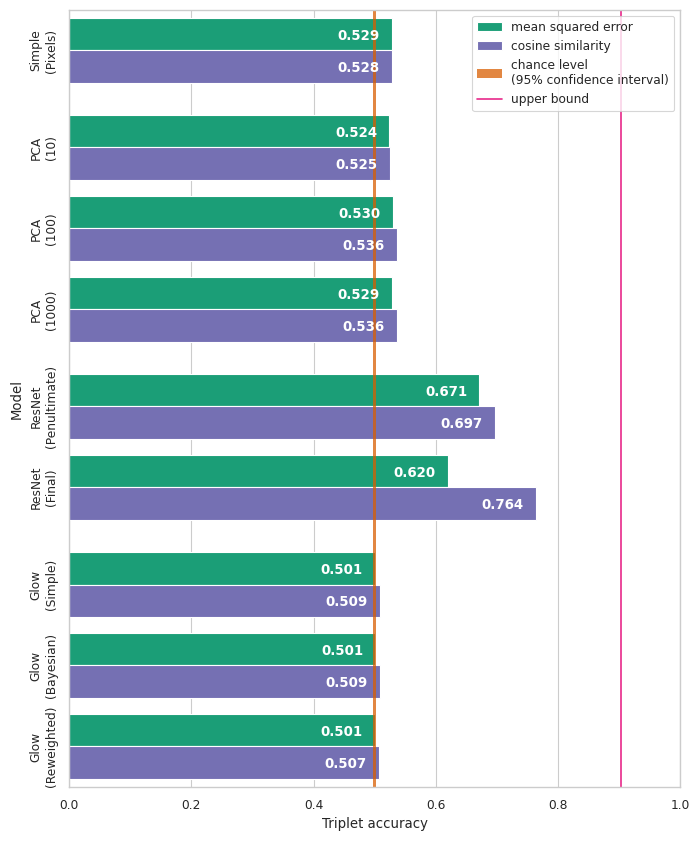

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7.0866, 8.5), tight_layout=True)

h = 2.5
# grid_lw = plt.rcParams["grid.linewidth"]
# grid_c = plt.rcParams["grid.color"]

means_8c2 = []
means_2c1 = []

offset = 0
y_tick_labels = []

for i, (path1, path2) in enumerate(csv_paths):
    if i in [1, 4, 6]:
        offset -= 0.5

    df_mse = pd.read_csv(path1, header=1)
    df_cos = pd.read_csv(path2, header=1)

    mse_mean, mse_mean_8c2, mse_mean_2c1 = mean_of_results(df_mse)
    cos_mean, cos_mean_8c2, cos_mean_2c1 = mean_of_results(df_cos)

    if i == 0:
        plt.barh(-i * h + 0.5, mse_mean, height=1.0, fc="C0", label="mean squared error")
        plt.barh(-i * h - 0.5, cos_mean, height=1.0, fc="C2", label="cosine similarity")
    else:
        plt.barh(-i * h + 0.5 + offset, mse_mean, height=1.0, fc="C0")
        plt.barh(-i * h - 0.5 + offset, cos_mean, height=1.0, fc="C2")

    plt.text(
        mse_mean - 0.02,
        -i * h + 0.5 + offset,
        f"{mse_mean:.3f}",
        fontweight="bold",
        ha="right",
        va="center_baseline",
        color="white",
    )
    plt.text(
        cos_mean - 0.02,
        -i * h - 0.5 + offset,
        f"{cos_mean:.3f}",
        fontweight="bold",
        ha="right",
        va="center_baseline",
        color="white",
    )

    means_8c2.append(mse_mean_8c2)
    means_8c2.append(cos_mean_8c2)
    means_2c1.append(mse_mean_2c1)
    means_2c1.append(cos_mean_2c1)

    y_tick_labels.append(-i * h + offset)

# plt.axhline(-1.25, lw=grid_lw, color=grid_c)
# plt.axhline(-8.75, lw=grid_lw, color=grid_c)
# plt.axhline(-13.75, lw=grid_lw, color=grid_c)

plt.fill_betweenx(
    [-22.75, 1.25],
    [0.49718648195070586, 0.49718648195070586],
    [0.5028135180492942, 0.5028135180492942],
    lw=0,
    color="C1",
    alpha=0.75,
    label="chance level\n(95% confidence interval)",
)
# ax.axvline(0.5, color="C1", alpha=0.75)

ax.axvline(0.903, color="C3", label="upper bound")

plt.xlim(0, 1)
plt.ylim(-22.75, 1.25)

# plt.yticks([-i * h for i in range(len(names))], names, ha="center", va="bottom", rotation=90)  # wrap=True
plt.yticks(y_tick_labels, names, wrap=True, ha="center", va="bottom", rotation=90)

plt.xlabel("Triplet accuracy")
plt.ylabel("Model")

plt.grid(False, "both", "y")

handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 0, 1]
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper right")

fig.savefig("evaluation.pdf")
plt.show()


[0.5286839243747589, 0.5287277701778386, 0.5241502683363148, 0.5255094882317864, 0.5301483741976218, 0.5367953979445087, 0.5287716159809183, 0.5361289417376969, 0.6745852187028658, 0.7002174751832755, 0.6212862604791469, 0.7679943175839209, 0.5007366094917395, 0.5085060857974675, 0.5007629169735873, 0.5085323932793153, 0.5008681469009786, 0.5066119471044231]
[0.5289893617021276, 0.5222074468085106, 0.5232712765957447, 0.5199468085106383, 0.5323138297872341, 0.5299202127659575, 0.5248670212765958, 0.5320478723404255, 0.6224734042553192, 0.6518617021276596, 0.605718085106383, 0.6977393617021277, 0.5042553191489362, 0.5162234042553191, 0.5042553191489362, 0.5162234042553191, 0.5014627659574468, 0.5097074468085107]


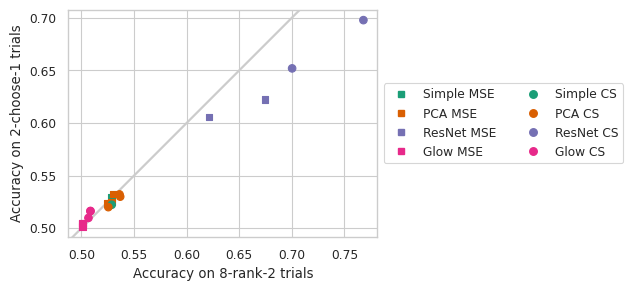

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7.0866, 3.0), tight_layout=True)

print(means_8c2)
print(means_2c1)

colors = ["C0", "C1", "C1", "C1", "C2", "C2", "C3", "C3", "C3"]
# markers = ["s", "D"] * 9

plt.plot(
    [0, 1], [0, 1], c=plt.rcParams["grid.color"], lw=2 * plt.rcParams["grid.linewidth"], zorder=-4
)

square_s = plt.rcParams["lines.markersize"]
x = [means_8c2[i] for i in range(len(means_8c2)) if i % 2 == 0]
y = [means_2c1[i] for i in range(len(means_2c1)) if i % 2 == 0]
plt.scatter(x, y, s=square_s**2, marker="s", c=colors)

circle_s = square_s * 2 / sqrt(pi)
x = [means_8c2[i] for i in range(len(means_8c2)) if i % 2 == 1]
y = [means_2c1[i] for i in range(len(means_2c1)) if i % 2 == 1]
plt.scatter(x, y, s=circle_s**2, marker="o", c=colors)

plt.xticks(np.arange(0.5, 0.751, 0.05))
plt.yticks(np.arange(0.5, 0.701, 0.05))

# plt.scatter(means_8c2, means_2c1)
plt.gca().set_aspect("equal", "box")
plt.ylim(0.4916489361702127, 0.7075531914893617)
plt.xlim(0.4873737240871304, 0.78135720298853)

plt.xlabel("Accuracy on 8-rank-2 trials")
plt.ylabel("Accuracy on 2-choose-1 trials")


legend_elements = [
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C0", label="Simple MSE"),
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C1", label="PCA MSE"),
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C2", label="ResNet MSE"),
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C3", label="Glow MSE"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C0", label="Simple CS"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C1", label="PCA CS"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C2", label="ResNet CS"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C3", label="Glow CS"),
]

plt.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)

fig.savefig("trial_correlation.pdf")
plt.show()


In [10]:
plt.rcParams["lines.markersize"]


4.800000000000001

In [11]:
df = pd.read_csv(path1, header=1)


In [12]:
df.head()


,trial_type,result
0,8choose2,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
1,8choose2,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]"
2,8choose2,"[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]"
3,8choose2,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]"
4,8choose2,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [13]:
x = df["result"][0]

print(x, type(x))


[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0] <class 'str'>


In [14]:
arr = np.frombuffer(bytes(x), "utf-8")

print(arr)


TypeError: string argument without an encoding

In [ ]:
print(list(x))


['[', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ']']


In [ ]:
print(np.array(x))
print(type(np.array(x)))
print(np.array(x).dtype)


[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
<class 'numpy.ndarray'>
<U39


In [ ]:
list(map(int, x.replace("[", "").replace(",", "").replace("]", "").split()))


[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]

In [ ]:
all = []
for r in df["result"]:
    # all.append(np.array(r).tolist())
    # l =
    all.extend(list(map(int, r.replace("[", "").replace(",", "").replace("]", "").split())))

print(len(all))
print(np.mean(all))


121556
0.5009542926716904


In [ ]:
list(map(int, 1.replace("[", "").replace(",", "").replace("]", "").split()))

SyntaxError: invalid syntax (4190463519.py, line 1)

In [ ]:
list(map(int, df["result"][9000].replace("[", "").replace(",", "").replace("]", "").split()))


[0]

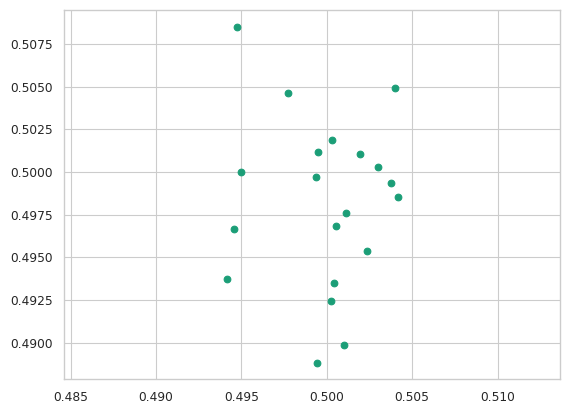

In [ ]:
# RANDOM
# From: `print(np.mean(results_8c2), np.mean(results_2c1))`

rand_results = np.array(
    [
        [0.49775509488231784, 0.504654255319149],
        [0.5002806131397103, 0.5018617021276596],
        [0.5019204461748922, 0.5010638297872341],
        [0.49472973446981655, 0.5085106382978724],
        [0.5041565821319584, 0.4985372340425532],
        [0.5004296888701814, 0.4934840425531915],
        [0.5037707390648567, 0.49933510638297873],
        [0.501131221719457, 0.4976063829787234],
        [0.5023501350450735, 0.4953457446808511],
        [0.5010084534708338, 0.4898936170212766],
        #
        [0.5039724297590235, 0.5049202127659574],
        [0.494984040127679, 0.5],
        [0.49945631204181135, 0.5011968085106383],
        [0.4941246623873163, 0.49375],
        [0.5030165912518854, 0.5002659574468085],
        [0.4994212353993476, 0.4888297872340426],
        [0.4993773895962678, 0.4997340425531915],
        [0.49456312041811357, 0.4966755319148936],
        [0.5002279981760146, 0.49242021276595743],
        [0.5005612262794206, 0.4968085106382979],
    ]
)

plt.scatter(rand_results[:, 0], rand_results[:, 1])

plt.gca().set_aspect("equal", "datalim")

plt.show()


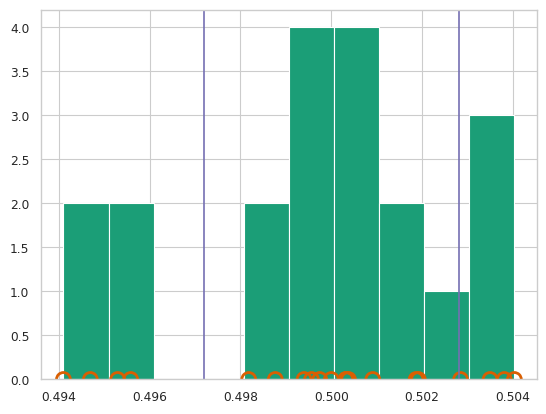

In [ ]:
n = 7520 + 8772 * 13

x = []
for r in rand_results:
    x.append((r[0] * 8772 * 13 + r[1] * 7520) / n)

plt.hist(x)
plt.scatter(x, np.zeros_like(x), s=100, ec="C1", fc="none", lw=2)

plt.axvline(0.49718648195070586, c="C2")
plt.axvline(0.5028135180492942, c="C2")

plt.show()
